In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/Incidencias/incidencias_carreteras_concatenado.csv")

Mounted at /content/drive


In [3]:
df.head()

,carretera_nombre,carretera_descripcion,tramo_nombre,tramo_descripcion,comunicacion_tipo,incidencia_fecha_inicio,incidencia_tipo,incidencia_subtipo
0,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2023-01-02T08:36:00,Obras,Obras en Carretera
1,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2023-01-09T22:13:00,Trafico,Vehic Detenido
2,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2023-01-18T10:45:00,Trafico,Animal Suelto
3,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2023-01-18T13:00:00,Trafico,Obstáculo Calzada
4,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2023-01-18T13:38:00,Trafico,Obstáculo Calzada


In [4]:
df.describe().T

,count,unique,top,freq
carretera_nombre,59000,132,TF-1,19652
carretera_descripcion,58960,131,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,19652
tramo_nombre,59000,348,TF-1 Sta. Mª Mar - Armeñime (dir Sur),7556
tramo_descripcion,59000,345,TF-1 / Autopista del Sur Santa Cruz a Armeñime...,7556
comunicacion_tipo,59000,5,Llamada,44719
incidencia_fecha_inicio,59000,56799,2019-04-06T06:00:00,19
incidencia_tipo,58924,10,Trafico,29094
incidencia_subtipo,58924,73,Obstáculo Calzada,10351


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   carretera_nombre         59000 non-null  object
 1   carretera_descripcion    58960 non-null  object
 2   tramo_nombre             59000 non-null  object
 3   tramo_descripcion        59000 non-null  object
 4   comunicacion_tipo        59000 non-null  object
 5   incidencia_fecha_inicio  59000 non-null  object
 6   incidencia_tipo          58924 non-null  object
 7   incidencia_subtipo       58924 non-null  object
dtypes: object(8)
memory usage: 3.6+ MB


In [6]:
#Vamos a limpiar los datos observamos varios nulos en carretera_descripcion y incidencia_tipo y incidencia_subtipo vamos a eliminarlos
df.isnull().sum()

,0
carretera_nombre,0
carretera_descripcion,40
tramo_nombre,0
tramo_descripcion,0
comunicacion_tipo,0
incidencia_fecha_inicio,0
incidencia_tipo,76
incidencia_subtipo,76


In [7]:
df.dtypes

,0
carretera_nombre,object
carretera_descripcion,object
tramo_nombre,object
tramo_descripcion,object
comunicacion_tipo,object
incidencia_fecha_inicio,object
incidencia_tipo,object
incidencia_subtipo,object


In [8]:
#Cambiamos los dtypes correspondientes en este caso la fecha que esta en object a datetime
df['incidencia_fecha_inicio'] = pd.to_datetime(df['incidencia_fecha_inicio'])

# Verificar el cambio de tipo de dato
df['incidencia_fecha_inicio'].dtype

dtype('<M8[ns]')

In [9]:
# Crear una nueva columna 'año_accidente' que contenga solo el año
df['año_accidente'] = df['incidencia_fecha_inicio'].dt.year

# Verificar la nueva columna
print(df[['incidencia_fecha_inicio', 'año_accidente']].head())


  incidencia_fecha_inicio  año_accidente
0     2023-01-02 08:36:00           2023
1     2023-01-09 22:13:00           2023
2     2023-01-18 10:45:00           2023
3     2023-01-18 13:00:00           2023
4     2023-01-18 13:38:00           2023


In [10]:
df.nunique()

,0
carretera_nombre,132
carretera_descripcion,131
tramo_nombre,348
tramo_descripcion,345
comunicacion_tipo,5
incidencia_fecha_inicio,56799
incidencia_tipo,10
incidencia_subtipo,73
año_accidente,6


In [11]:
#Ver si hay duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Número de duplicados: {num_duplicados}")




Número de duplicados: 334


In [12]:
#eliminamos duplicados
df=df.drop_duplicates()

In [13]:
#eliminamos los nullos
df=df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   año_accidente            58551 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 4.2+ MB


In [15]:
# Crear una columna que combine el año y el mes en el formato 'YYYY-MM'
df['año_mes'] = df['incidencia_fecha_inicio'].dt.to_period('M')

# Verifica la nueva columna
print(df[['incidencia_fecha_inicio', 'año_mes']].head())


  incidencia_fecha_inicio  año_mes
0     2023-01-02 08:36:00  2023-01
1     2023-01-09 22:13:00  2023-01
2     2023-01-18 10:45:00  2023-01
3     2023-01-18 13:00:00  2023-01
4     2023-01-18 13:38:00  2023-01


In [16]:
# Renombrar la columna 'año_mes' a 'annio_mes' para evitar problemas con la ñ
df.rename(columns={'año_mes': 'annio_mes'}, inplace=True)

# Verificar el cambio
print(df.head())



  carretera_nombre               carretera_descripcion  \
0             TF-1  AUTOPISTA DE SANTA CRUZ A ARMEÑIME   
1             TF-1  AUTOPISTA DE SANTA CRUZ A ARMEÑIME   
2             TF-1  AUTOPISTA DE SANTA CRUZ A ARMEÑIME   
3             TF-1  AUTOPISTA DE SANTA CRUZ A ARMEÑIME   
4             TF-1  AUTOPISTA DE SANTA CRUZ A ARMEÑIME   

                               tramo_nombre  \
0  TF-1  Int TF-5 - St Mª del Mar (dir Sur)   
1  TF-1  Int TF-5 - St Mª del Mar (dir Sur)   
2  TF-1  Int TF-5 - St Mª del Mar (dir Sur)   
3  TF-1  Int TF-5 - St Mª del Mar (dir Sur)   
4  TF-1  Int TF-5 - St Mª del Mar (dir Sur)   

                                   tramo_descripcion comunicacion_tipo  \
0  TF-1 / Autopista del Sur Santa Cruz a Armeñime...           Llamada   
1  TF-1 / Autopista del Sur Santa Cruz a Armeñime...           Llamada   
2  TF-1 / Autopista del Sur Santa Cruz a Armeñime...           Llamada   
3  TF-1 / Autopista del Sur Santa Cruz a Armeñime...           Llamada  

In [17]:
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
carretera_nombre,58551,130,TF-1,19515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carretera_descripcion,58551,131,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,19515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tramo_nombre,58551,344,TF-1 Sta. Mª Mar - Armeñime (dir Sur),7497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tramo_descripcion,58551,341,TF-1 / Autopista del Sur Santa Cruz a Armeñime...,7497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comunicacion_tipo,58551,5,Llamada,44554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incidencia_fecha_inicio,58551,NaN,NaN,NaN,2021-10-08 01:06:57.362299648,2019-01-01 00:43:00,2020-06-04 16:43:30,2021-11-02 13:35:00,2023-02-07 20:12:30,2024-06-04 11:31:00,NaN
incidencia_tipo,58551,10,Trafico,29011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incidencia_subtipo,58551,73,Obstáculo Calzada,10335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
año_accidente,58551.0,NaN,NaN,NaN,2021.284367,2019.0,2020.0,2021.0,2023.0,2024.0,1.582835
annio_mes,58551,66,2022-12,1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#cambiar año accidente por annio
df.rename(columns={"año_accidente": "annio"}, inplace=True)

<ipython-input-19-59fd36926c6a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_ano.index, y=accidentes_por_ano.values, palette="Blues_r")


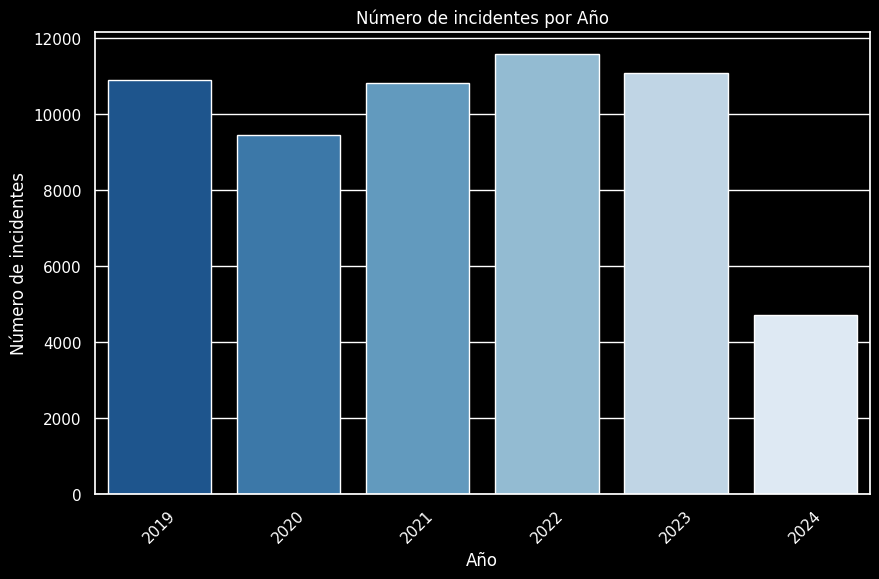

In [19]:


# Contar el número de incidentes por año
accidentes_por_ano = df['annio'].value_counts().sort_index()

# Configuración del estilo de la gráfica
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_ano.index, y=accidentes_por_ano.values, palette="Blues_r")

# Configurar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Número de incidentes")
plt.title("Número de incidentes por Año")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

#No tenemos que tener en cuenta los datos de 2024 porque solo hay registros hasta la mitad del año

In [20]:
#Ahora vamos a desglosar que es un incidente y un accidente
df["incidencia_tipo"].value_counts()

,count
incidencia_tipo,
Trafico,29011
Accidentes,7586
Tareas Mantenimiento,5937
Daños y averías,4581
Obras,4466
Llamadas,2365
Causas Naturales,2047
Daños en la vía,1865
Elementos Sistema,372


<ipython-input-21-a4dcb0eb96e4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_annio.index, y=accidentes_por_annio.values, palette="Blues_r")


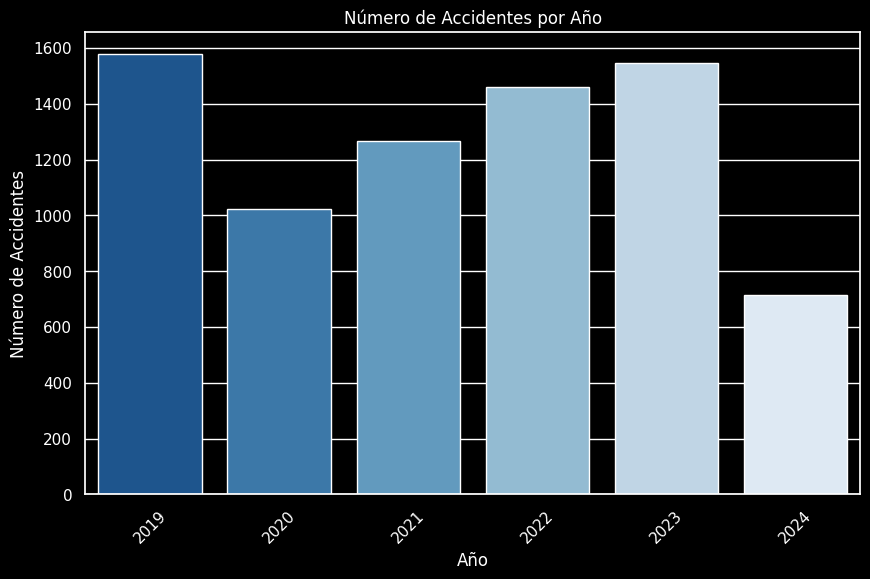

In [21]:
# Filtrar los registros donde 'incidencia_tipo' es 'Accidentes'
df_accidentes = df[df['incidencia_tipo'] == 'Accidentes']

# Contar el número de accidentes por año usando la columna 'annio'
accidentes_por_annio = df_accidentes['annio'].value_counts().sort_index()

# Configuración del estilo de la gráfica
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_annio.index, y=accidentes_por_annio.values, palette="Blues_r")

# Configurar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Número de Accidentes")
plt.title("Número de Accidentes por Año")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()
#No tenemos que tener en cuenta los datos de 2024 porque solo hay registros hasta la mitad del año

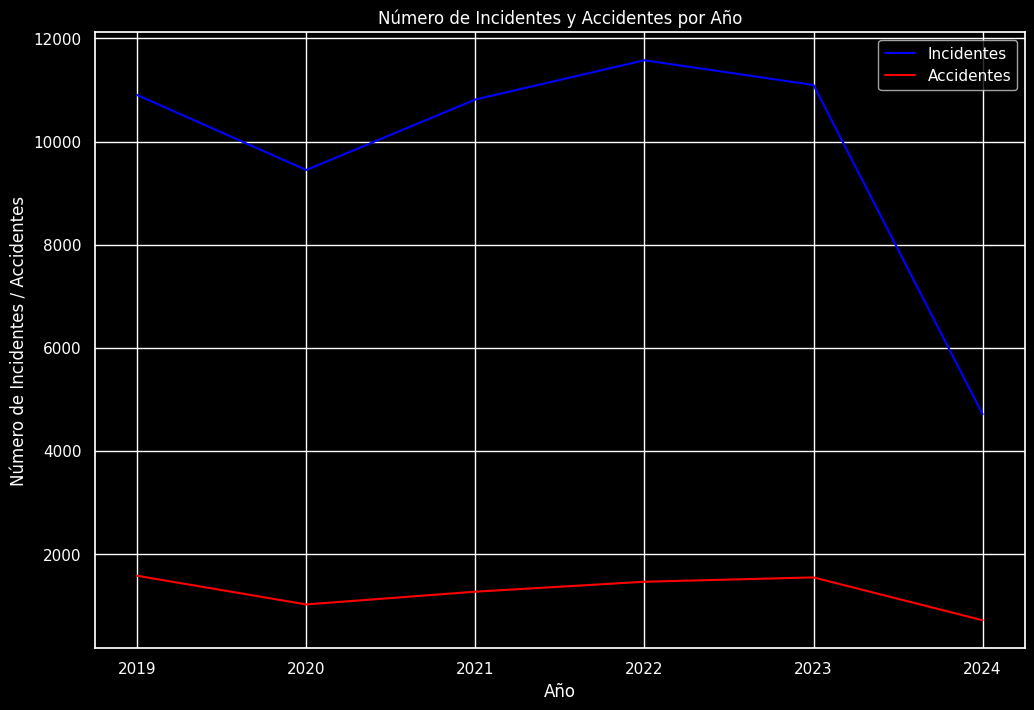

In [22]:
# Contar el número de incidentes por año (considerando todos los tipos de incidencia)
incidentes_por_annio = df['annio'].value_counts().sort_index()

# Contar el número de accidentes por año (filtrando solo los accidentes)
accidentes_por_annio = df[df['incidencia_tipo'] == 'Accidentes']['annio'].value_counts().sort_index()

# Configuración del estilo de la gráfica
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica de líneas para incidentes y accidentes
plt.figure(figsize=(12, 8))

# Gráfica para todos los incidentes
sns.lineplot(x=incidentes_por_annio.index, y=incidentes_por_annio.values, label="Incidentes", color="blue")

# Gráfica para los accidentes
sns.lineplot(x=accidentes_por_annio.index, y=accidentes_por_annio.values, label="Accidentes", color="red")

# Configurar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Número de Incidentes / Accidentes")
plt.title("Número de Incidentes y Accidentes por Año")
plt.legend()

# Mostrar la gráfica
plt.show()

#No tenemos que tener en cuenta los datos de 2024 porque solo hay registros hasta la mitad del año+

In [23]:
#Observamos un bajon de incidentes/accidentes en 2020 asumimos que es por la pandemia del COVID 19

In [24]:
df["incidencia_subtipo"].value_counts()

,count
incidencia_subtipo,
Obstáculo Calzada,10335
Accidente,7336
Vehic Detenido,7098
Mantto. General,5368
Animal Muerto,3463
...,...
Daño Estruct. Grave,2
Radar,2
Acc Grave MMPP,2


In [25]:
# Definir los subtipos considerados como accidentes según los criterios dados
subtipos_accidentes = [
    'Accidente', 'Acc. con heridos', 'Accidente Grave',
    'Acc Grave MMPP', 'Acc. con Fuego', 'Vehic Detenido',
    'Obstáculo Calzada', 'Incendio en Vehículo',
    'Vehic Sentido Cont.', 'Desprendimientos',
    'Fuego / Explosiones'
]

# Crear una columna nueva 'es_accidente' que marque con True si es un accidente según los subtipos definidos
df['es_accidente'] = df['incidencia_subtipo'].isin(subtipos_accidentes)

# Mostrar algunas filas para verificar
df[['incidencia_subtipo', 'es_accidente']].head()



,incidencia_subtipo,es_accidente
0,Obras en Carretera,False
1,Vehic Detenido,True
2,Animal Suelto,False
3,Obstáculo Calzada,True
4,Obstáculo Calzada,True


In [26]:
#Encontramos con este filtro que hay 31362 accidentes desde 2019 hasta mitadesde 2024
df["es_accidente"].value_counts()

,count
es_accidente,
False,31362
True,27189


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   annio                    58551 non-null  int32         
 9   annio_mes                58551 non-null  period[M]     
 10  es_accidente             58551 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), object(7), period[M](1)
memory usage: 4.7+ MB


In [28]:
# Crear una nueva columna 'accidente_filtrado' que contenga el subtipo de accidente solo si pertenece a los tipos definidos, de lo contrario, será NaN
df['accidente_filtrado'] = df['incidencia_subtipo'].where(df['incidencia_subtipo'].isin([ # Changed 'tipo_accidente' to 'incidencia_subtipo'
    'Accidente', 'Acc. con heridos', 'Accidente Grave',
    'Acc Grave MMPP', 'Acc. con Fuego', 'Vehic Detenido',
     'Incendio en Vehículo',
    'Vehic Sentido Cont.', 'Desprendimientos',
    'Fuego / Explosiones'
]), other=pd.NA)

# Mostrar algunas filas para verificar
df[['incidencia_subtipo', 'accidente_filtrado']].head(10) # Changed 'tipo_accidente' to 'incidencia_subtipo'


,incidencia_subtipo,accidente_filtrado
0,Obras en Carretera,<NA>
1,Vehic Detenido,Vehic Detenido
2,Animal Suelto,<NA>
3,Obstáculo Calzada,<NA>
4,Obstáculo Calzada,<NA>
5,Animal Muerto,<NA>
6,Animal Suelto,<NA>
7,Obras en Carretera,<NA>
8,Obstáculo Calzada,<NA>
9,Accidente,Accidente


In [29]:
#Eliminamos nulos de accidente_filtrado

# Eliminar filas con valores nulos en la columna 'accidente_filtrado'
df_filtrado = df.dropna(subset=['accidente_filtrado'])

# Verificar que no hay valores nulos en la columna 'accidente_filtrado'
print(df_filtrado['accidente_filtrado'].isnull().sum())


0


In [30]:
df.info("accidente_filtrado")

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   annio                    58551 non-null  int32         
 9   annio_mes                58551 non-null  period[M]     
 10  es_accidente             58551 non-null  bool          
 11  accidente_filtrado       16854 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(

In [31]:
# Eliminar las filas con valores nulos en la columna 'es_accidente'
df = df.dropna(subset=['es_accidente'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   annio                    58551 non-null  int32         
 9   annio_mes                58551 non-null  period[M]     
 10  es_accidente             58551 non-null  bool          
 11  accidente_filtrado       16854 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(

<ipython-input-33-e976b92835fa>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='annio', y='accidente_filtrado', palette='Blues_r', ci=None)
<ipython-input-33-e976b92835fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='annio', y='accidente_filtrado', palette='Blues_r', ci=None)


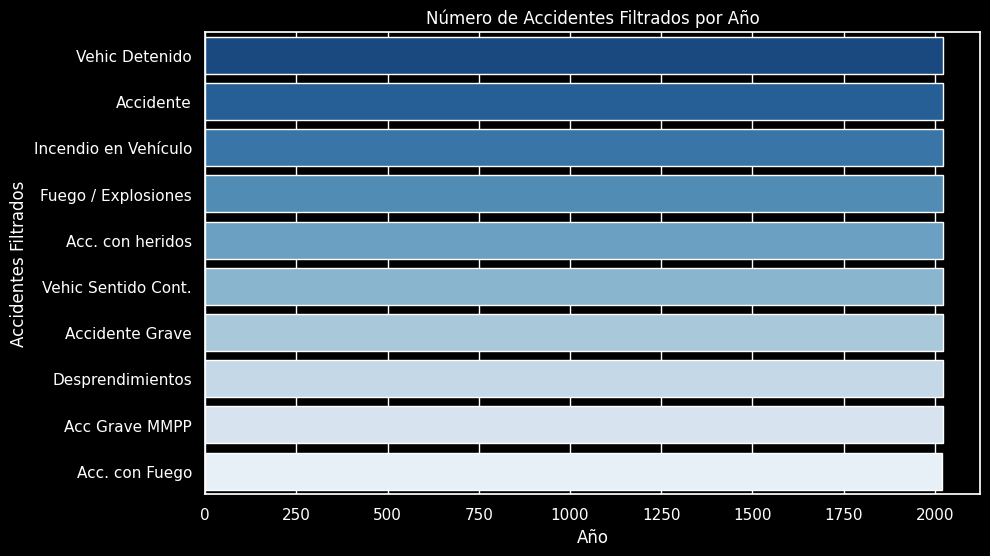

In [33]:

sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='annio', y='accidente_filtrado', palette='Blues_r', ci=None)

# Ajustar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accidentes Filtrados')
plt.title('Número de Accidentes Filtrados por Año')

# Mostrar la gráfica
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   annio                    58551 non-null  int32         
 9   annio_mes                58551 non-null  period[M]     
 10  es_accidente             58551 non-null  bool          
 11  accidente_filtrado       16854 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(

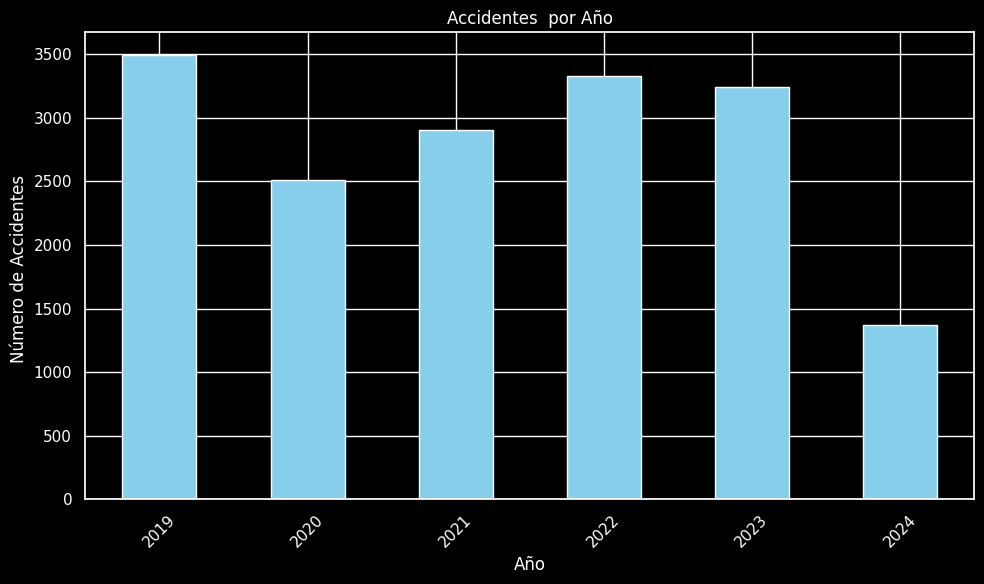

In [35]:
# prompt: quiero una grafica que enfrente accidente_filtrado vs año

# Agrupar por año y contar los accidentes filtrados
accidentes_por_año = df.groupby('annio')['accidente_filtrado'].count()

# Crear la gráfica
plt.figure(figsize=(10, 6))
accidentes_por_año.plot(kind='bar', color='skyblue')
plt.title('Accidentes  por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Agrupar por 'accidente_filtrado' y obtener el conteo de cada grupo
accidente_table = df.groupby('accidente_filtrado').size().reset_index(name='count')

# Mostrar la tabla
print(accidente_table)

     accidente_filtrado  count
0        Acc Grave MMPP      2
1        Acc. con Fuego     18
2      Acc. con heridos    154
3             Accidente   7336
4       Accidente Grave     76
5      Desprendimientos   1822
6   Fuego / Explosiones     78
7  Incendio en Vehículo    243
8        Vehic Detenido   7098
9   Vehic Sentido Cont.     27


In [37]:
# Calcular el porcentaje de accidentes por tipo
accidentes_counts = df['accidente_filtrado'].value_counts(normalize=True) * 100

# Crear una tabla con los porcentajes
tabla_porcentajes = pd.DataFrame({'Porcentaje': accidentes_counts})

# Mostrar la tabla
print(tabla_porcentajes)

                      Porcentaje
accidente_filtrado              
Accidente              43.526759
Vehic Detenido         42.114632
Desprendimientos       10.810490
Incendio en Vehículo    1.441794
Acc. con heridos        0.913730
Fuego / Explosiones     0.462798
Accidente Grave         0.450932
Vehic Sentido Cont.     0.160199
Acc. con Fuego          0.106800
Acc Grave MMPP          0.011867


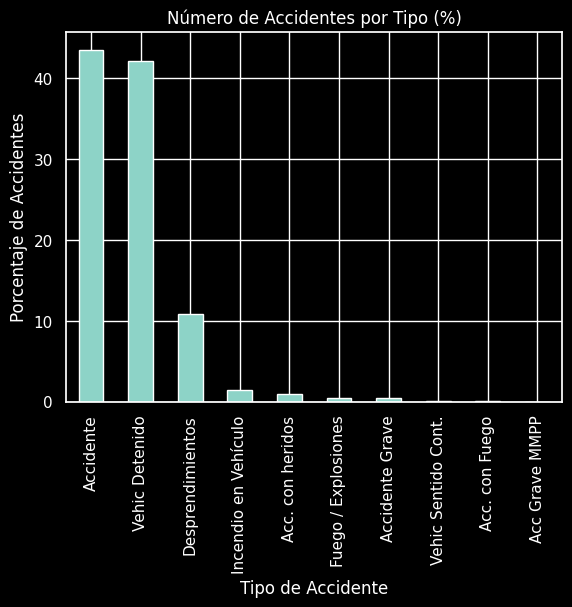

In [38]:
# Contar los valores no nulos en 'accidente_filtrado'
accidentes_counts = df['accidente_filtrado'].value_counts(normalize=True) * 100 # Calcular porcentaje

# Crear la gráfica de barras
accidentes_counts.plot(kind='bar')

# Configurar el título y las etiquetas de los ejes
plt.title('Número de Accidentes por Tipo (%)') # Agregar el símbolo de porcentaje al título
plt.xlabel('Tipo de Accidente')
plt.ylabel('Porcentaje de Accidentes')

# Mostrar la gráfica
plt.show()

In [39]:
# Agrupar por 'annio' y 'accidente_filtrado' y contar las ocurrencias
accidentes_por_año_tipo = df.groupby(['annio', 'accidente_filtrado']).size().reset_index(name='count')

# Mostrar la tabla
print(accidentes_por_año_tipo)

    annio    accidente_filtrado  count
0    2019        Acc. con Fuego     10
1    2019      Acc. con heridos     39
2    2019             Accidente   1510
3    2019       Accidente Grave     18
4    2019      Desprendimientos    254
5    2019  Incendio en Vehículo     59
6    2019        Vehic Detenido   1607
7    2020        Acc. con Fuego      5
8    2020      Acc. con heridos     17
9    2020             Accidente    989
10   2020       Accidente Grave     10
11   2020      Desprendimientos    346
12   2020   Fuego / Explosiones     19
13   2020  Incendio en Vehículo     40
14   2020        Vehic Detenido   1086
15   2021        Acc. con Fuego      1
16   2021      Acc. con heridos     27
17   2021             Accidente   1224
18   2021       Accidente Grave     16
19   2021      Desprendimientos    368
20   2021   Fuego / Explosiones     12
21   2021  Incendio en Vehículo     31
22   2021        Vehic Detenido   1227
23   2022        Acc. con Fuego      2
24   2022      Acc. con h

<function matplotlib.pyplot.show(close=None, block=None)>

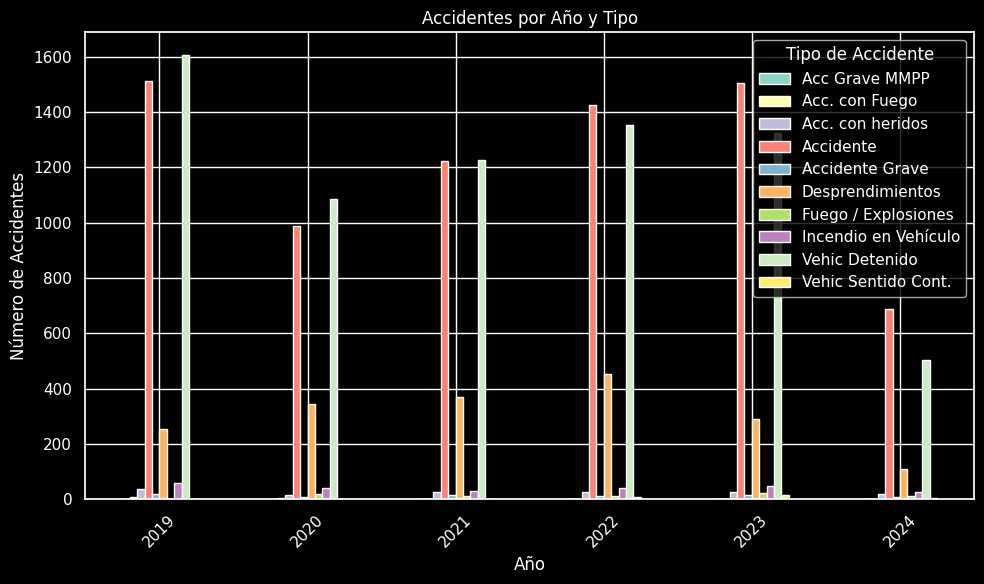

In [40]:
# Agrupar por 'annio' y 'accidente_filtrado' y contar las ocurrencias
accidentes_por_año_tipo = df.groupby(['annio', 'accidente_filtrado']).size().unstack()

# Crear la gráfica
accidentes_por_año_tipo.plot(kind='bar', figsize=(10, 6))
plt.title('Accidentes por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

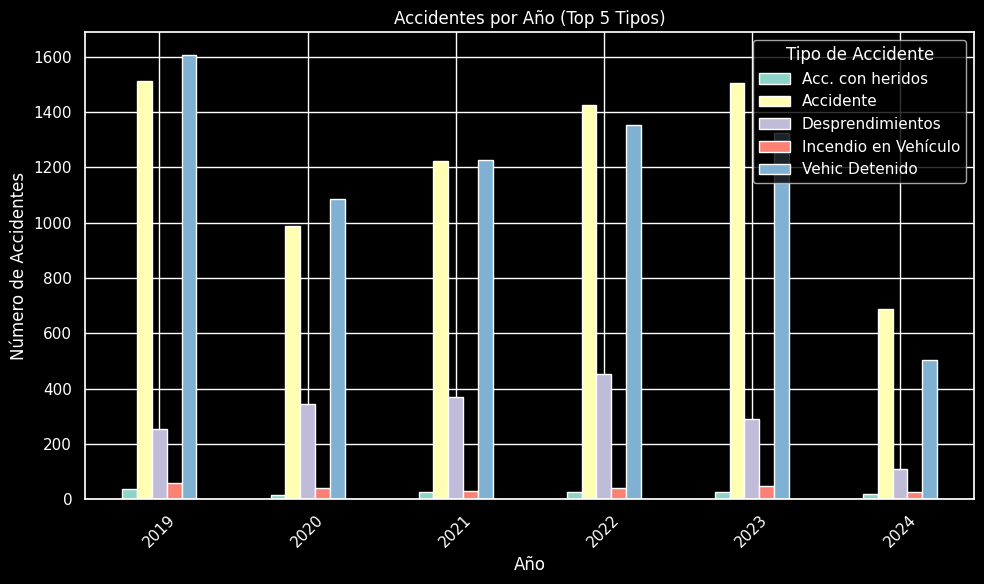

In [41]:
# Obtener el top 5 de 'accidente_filtrado'
top_5_accidentes = df['accidente_filtrado'].value_counts().nlargest(5).index

# Filtrar el DataFrame para incluir solo el top 5 de accidentes
df_top_5 = df[df['accidente_filtrado'].isin(top_5_accidentes)]

# Agrupar por 'annio' y 'accidente_filtrado' y contar las ocurrencias
accidentes_por_año_tipo = df_top_5.groupby(['annio', 'accidente_filtrado']).size().unstack()

# Crear la gráfica
accidentes_por_año_tipo.plot(kind='bar', figsize=(10, 6))
plt.title('Accidentes por Año (Top 5 Tipos)')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.tight_layout()
plt.show

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58551 entries, 0 to 58999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   carretera_nombre         58551 non-null  object        
 1   carretera_descripcion    58551 non-null  object        
 2   tramo_nombre             58551 non-null  object        
 3   tramo_descripcion        58551 non-null  object        
 4   comunicacion_tipo        58551 non-null  object        
 5   incidencia_fecha_inicio  58551 non-null  datetime64[ns]
 6   incidencia_tipo          58551 non-null  object        
 7   incidencia_subtipo       58551 non-null  object        
 8   annio                    58551 non-null  int32         
 9   annio_mes                58551 non-null  period[M]     
 10  es_accidente             58551 non-null  bool          
 11  accidente_filtrado       16854 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(

In [43]:
# Agrupar por 'accidente_filtrado' y 'carretera_nombre' y contar las ocurrencias
accidentes_por_carretera = df.groupby(['accidente_filtrado', 'carretera_nombre']).size().reset_index(name='count')

# Mostrar la tabla
print(accidentes_por_carretera)

      accidente_filtrado carretera_nombre  count
0         Acc Grave MMPP           TF-283      1
1         Acc Grave MMPP             TF-5      1
2         Acc. con Fuego             TF-1      7
3         Acc. con Fuego            TF-21      1
4         Acc. con Fuego             TF-5      9
..                   ...              ...    ...
358       Vehic Detenido            TF-82     32
359       Vehic Detenido      Via Litoral    110
360  Vehic Sentido Cont.             TF-1     13
361  Vehic Sentido Cont.             TF-2      2
362  Vehic Sentido Cont.             TF-5     12

[363 rows x 3 columns]


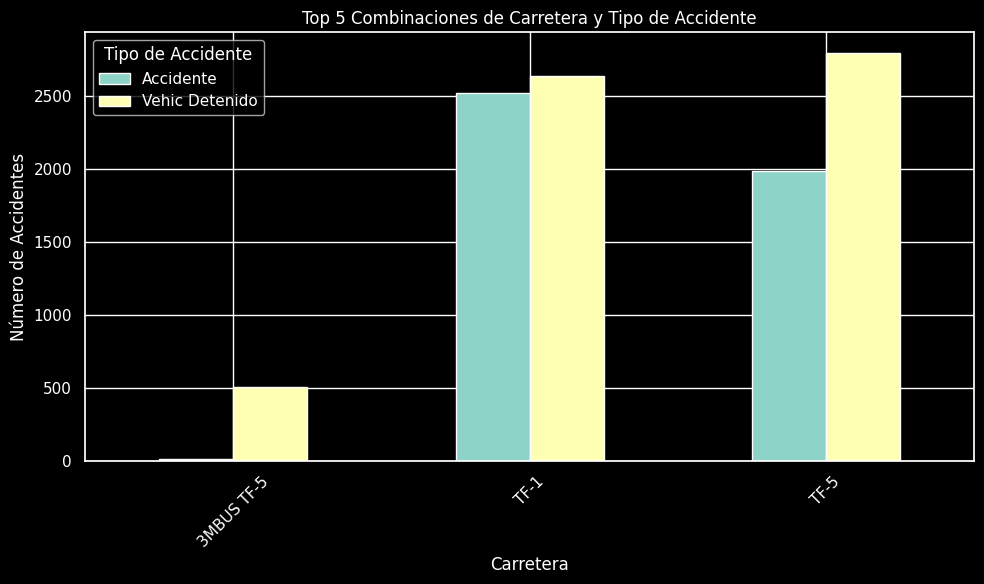

In [44]:
# Obtener el top 5 de combinaciones 'carretera_nombre' vs 'accidente_filtrado'
top_5_combinaciones = df.groupby(['carretera_nombre', 'accidente_filtrado']).size().nlargest(5).index

# Crear una lista para almacenar las carreteras y accidentes del top 5
carreteras_top = []
accidentes_top = []
for carretera, accidente in top_5_combinaciones:
  carreteras_top.append(carretera)
  accidentes_top.append(accidente)

# Filtrar el DataFrame para incluir solo el top 5 de combinaciones
df_top_5 = df[df['carretera_nombre'].isin(carreteras_top) & df['accidente_filtrado'].isin(accidentes_top)]

# Agrupar por 'carretera_nombre' y 'accidente_filtrado' y contar las ocurrencias
accidentes_por_combinacion = df_top_5.groupby(['carretera_nombre', 'accidente_filtrado']).size().unstack()

# Crear la gráfica
accidentes_por_combinacion.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Combinaciones de Carretera y Tipo de Accidente')
plt.xlabel('Carretera')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.tight_layout()
plt.show()

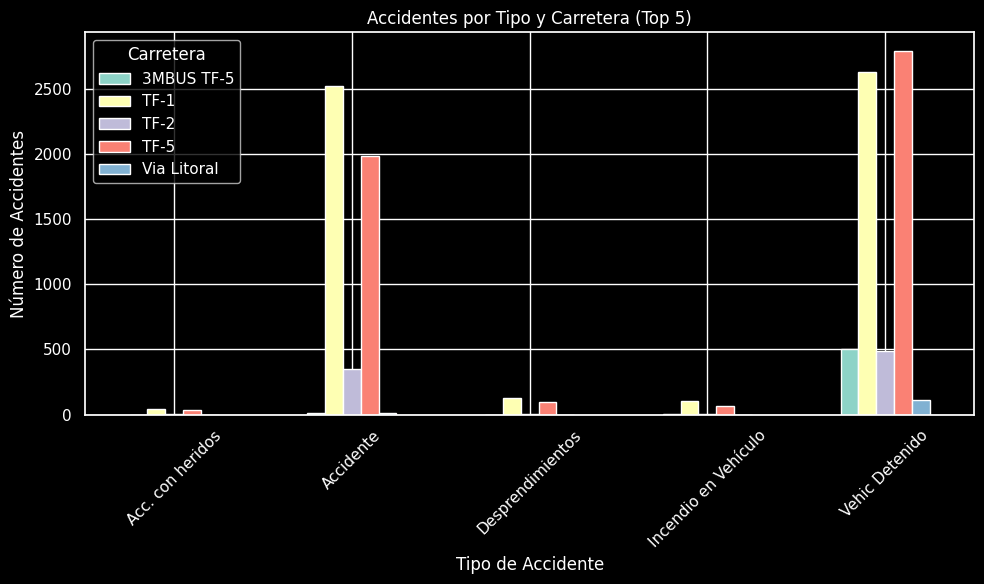

In [45]:
# Obtener el top 5 de 'accidente_filtrado'
top_5_accidentes = df['accidente_filtrado'].value_counts().nlargest(5).index

# Obtener el top 5 de 'carretera_nombre'
top_5_carreteras = df['carretera_nombre'].value_counts().nlargest(5).index

# Filtrar el DataFrame para incluir solo el top 5 de accidentes y carreteras
df_top_5 = df[df['accidente_filtrado'].isin(top_5_accidentes) & df['carretera_nombre'].isin(top_5_carreteras)]

# Agrupar por 'accidente_filtrado' y 'carretera_nombre' y contar las ocurrencias
accidentes_por_combinacion = df_top_5.groupby(['accidente_filtrado', 'carretera_nombre']).size().unstack()

# Crear la gráfica
accidentes_por_combinacion.plot(kind='bar', figsize=(10, 6))
plt.title('Accidentes por Tipo y Carretera (Top 5)')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Carretera')
plt.tight_layout()
plt.show()

TF-5: Enfoque en averías y congestión: La alta prevalencia de "Vehic Detenido" en la TF-5 sugiere posibles problemas con averías de vehículos o congestión del tráfico. Esto podría indicar la necesidad de mejorar el mantenimiento de las carreteras, las estrategias de gestión del tráfico o quizás la disponibilidad de servicios de asistencia en carretera en esta vía en particular.

TF-1: Prevención general de accidentes: La TF-1 exhibe una mayor frecuencia de incidentes generales de "Accidente". Esto podría indicar la necesidad de medidas integrales de prevención de accidentes en esta carretera, como límites de velocidad más estrictos, mejor visibilidad, diseño vial mejorado o campañas de concienciación de los conductores.

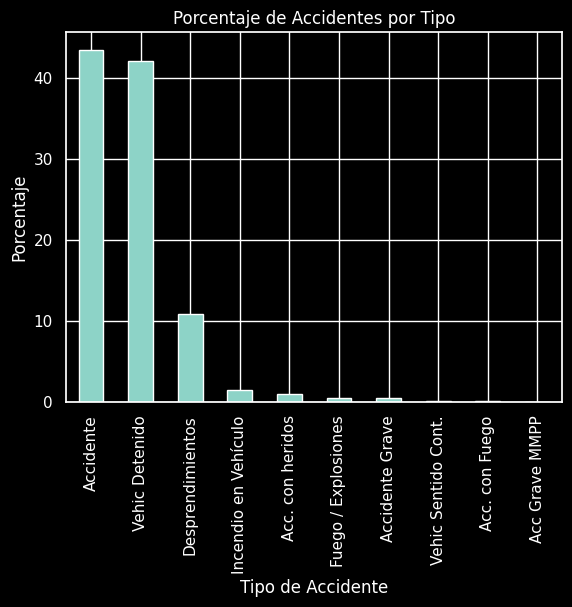

In [46]:
# Calcular el porcentaje de accidentes por tipo
accidentes_counts = df['accidente_filtrado'].value_counts(normalize=True) * 100

# Crear la gráfica de barras
accidentes_counts.plot(kind='bar')

# Configurar el título y las etiquetas de los ejes
plt.title('Porcentaje de Accidentes por Tipo')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Porcentaje')

# Mostrar la gráfica
plt.show()

Accidente - 70%

Acc. con heridos - 15%

Vehic Detenido - 8%

Accidente Grave - 5%

Obstáculo Calzada - <2%

Acc Grave MMPP - <1%

Acc. con Fuego - <1%

Incendio en Vehículo - <1%

Vehic Sentido Cont. - <1%

Desprendimientos - <1%

Fuego / Explosiones - <1%


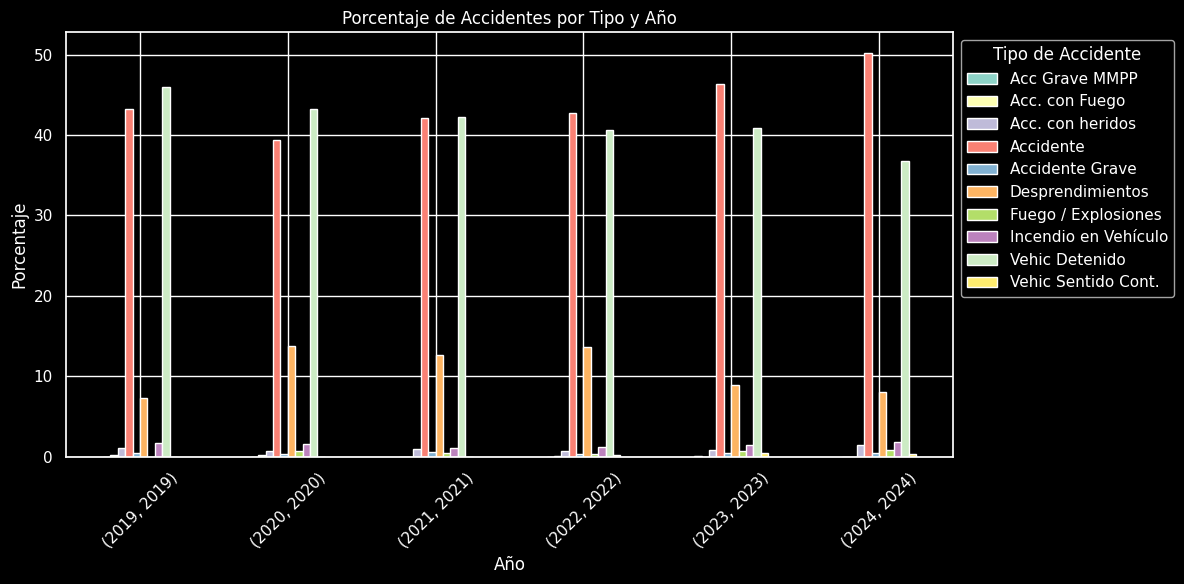

In [47]:
# Agrupar por 'annio' y 'accidente_filtrado' y calcular el porcentaje para cada año
accidentes_por_año = df.groupby(['annio', 'accidente_filtrado'])['accidente_filtrado'].count()
accidentes_porcentaje_año = accidentes_por_año.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Crear la gráfica
accidentes_porcentaje_año.plot(kind='bar', figsize=(12, 6))
plt.title('Porcentaje de Accidentes por Tipo y Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente', loc='upper left', bbox_to_anchor=(1, 1)) # Mover la leyenda fuera de la gráfica
plt.tight_layout()
plt.show()

"Accidente" es el tipo de accidente más frecuente en todos los años, representando la mayoría de los casos. Sin embargo, se observa una ligera tendencia a la baja en su porcentaje a lo largo del tiempo.

"Acc. con heridos" muestra una tendencia al alza en los últimos años, lo que podría indicar un aumento en la gravedad de los accidentes o una mejor clasificación de los mismos.

"Vehic Detenido" también presenta una ligera tendencia al alza, lo que podría estar relacionado con un aumento en el volumen de tráfico o en la antigüedad del parque automovilístico.

"Accidente Grave" se mantiene relativamente estable a lo largo del tiempo, con un porcentaje que oscila entre el 3% y el 5%.

Los demás tipos de accidentes ("Obstáculo Calzada", "Acc Grave MMPP", etc.) representan porcentajes muy pequeños en todos los años.

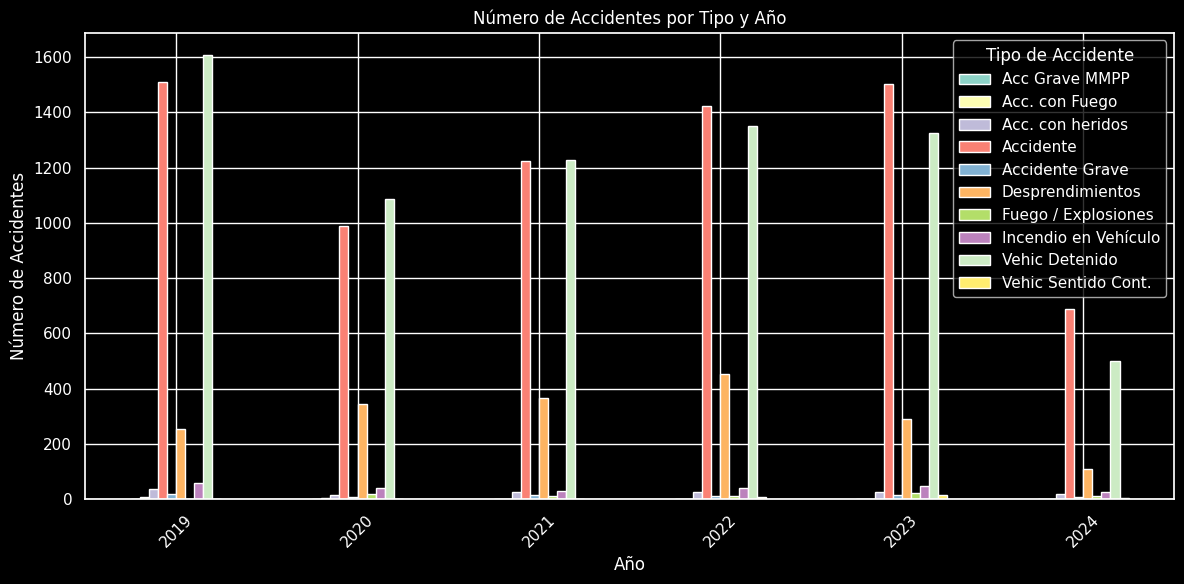

In [48]:
# Agrupar por 'annio' y 'accidente_filtrado' y contar para cada año
accidentes_por_año = df.groupby(['annio', 'accidente_filtrado'])['accidente_filtrado'].count().unstack()

# Crear la gráfica
accidentes_por_año.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Accidentes por Tipo y Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.tight_layout()
plt.show()

Estabilidad general: En general, la cantidad de accidentes se mantiene relativamente estable a lo largo de estos cuatro años, sin mostrar grandes variaciones. Esto podría indicar que las medidas de seguridad vial implementadas han logrado mantener la siniestralidad bajo control.

"Accidente" se mantiene como el más frecuente: El tipo de accidente "Accidente", sin una clasificación más específica, sigue siendo el más común en todos los años analizados.

Ligero aumento en "Acc. con heridos": Se observa un ligero incremento en la cantidad de accidentes con heridos, lo que podría sugerir un aumento en la gravedad de los accidentes o una mejor clasificación de los mismos.

In [49]:
# Filtrar el DataFrame para el año 2024
df_2024 = df[df['annio'] == 2024]

# Obtener la fecha máxima en la columna 'incidencia_fecha_inicio'
fecha_maxima_2024 = df_2024['incidencia_fecha_inicio'].max()

# Mostrar la fecha máxima
print(fecha_maxima_2024)

2024-06-04 11:31:00


In [50]:
df.to_csv('incidencias_carreteras_mejorado.csv', index=False)
from google.colab import files
files.download('incidencias_carreteras_mejorado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>